<a href="https://colab.research.google.com/github/FUHAR-GARG/Image_Classifier_Fuhar/blob/main/ImageClassifierCNN_Fuhar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

***Load dataset***

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape


(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
y_test = y_test.reshape(-1,)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

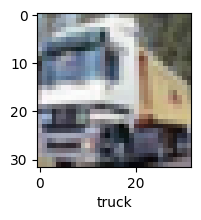

In [11]:
plot_sample(X_train, y_train, 1)


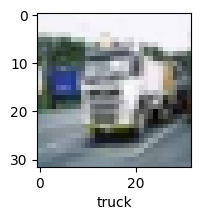

In [12]:
plot_sample(X_train, y_train, 1000)


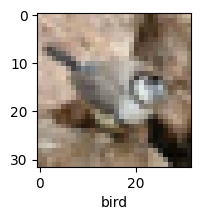

In [10]:
plot_sample(X_train, y_train, 90)


***Normalizing training data***

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

***Building simple artificial neural network for image classification***

In [14]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=6)

Epoch 1/6
1563/1563 [==============================] - 150s 94ms/step - loss: 1.8110 - accuracy: 0.3516
Epoch 2/6
1563/1563 [==============================] - 168s 108ms/step - loss: 1.6249 - accuracy: 0.4266
Epoch 3/6
1563/1563 [==============================] - 151s 97ms/step - loss: 1.5417 - accuracy: 0.4570
Epoch 4/6
1563/1563 [==============================] - 142s 91ms/step - loss: 1.4811 - accuracy: 0.4775
Epoch 5/6
1563/1563 [==============================] - 139s 89ms/step - loss: 1.4324 - accuracy: 0.4965
Epoch 6/6
1563/1563 [==============================] - 140s 89ms/step - loss: 1.3916 - accuracy: 0.5123


*accuracy is  around 52%*

In [15]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 14s 44ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.47      0.55      1000
           1       0.73      0.45      0.55      1000
           2       0.49      0.24      0.33      1000
           3       0.31      0.49      0.38      1000
           4       0.49      0.36      0.41      1000
           5       0.35      0.40      0.37      1000
           6       0.54      0.56      0.55      1000
           7       0.58      0.54      0.56      1000
           8       0.62      0.63      0.63      1000
           9       0.43      0.74      0.55      1000

    accuracy                           0.49     10000
   macro avg       0.52      0.49      0.49     10000
weighted avg       0.52      0.49      0.49     10000



***Building a convolutional neural network to train our images***

In [16]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [17]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.4604 - accuracy: 0.4745
Epoch 2/10
1563/1563 [==============================] - 63s 41ms/step - loss: 1.1095 - accuracy: 0.6109
Epoch 3/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.9758 - accuracy: 0.6583
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8872 - accuracy: 0.6892
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8128 - accuracy: 0.7169
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7569 - accuracy: 0.7353
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7041 - accuracy: 0.7515
Epoch 8/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6584 - accuracy: 0.7709
Epoch 9/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.6205 - accuracy: 0.7821
Epoch 10/10
1563/1563 [==============================] - 63s 40m

With CNN, at the end 6 epochs, accuracy was at around 80% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features




In [19]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.9225 - accuracy: 0.6982


[0.92254638671875, 0.698199987411499]

In [20]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 11ms/step


array([[5.35403704e-03, 1.42453064e-04, 5.88048389e-03, 8.12054098e-01,
        6.76845317e-04, 1.08700030e-01, 2.49081217e-02, 1.64969731e-03,
        4.05377634e-02, 9.64551364e-05],
       [2.10734812e-04, 9.99045675e-04, 6.97116150e-07, 2.82226740e-08,
        1.67528995e-07, 8.99248565e-10, 4.08784551e-12, 1.47822435e-10,
        9.98433828e-01, 3.55579919e-04],
       [4.00976185e-03, 4.28277105e-01, 8.00159352e-04, 4.75713285e-03,
        5.08715806e-04, 5.88816474e-04, 7.01411409e-06, 5.81462809e-04,
        5.43395102e-01, 1.70746874e-02],
       [7.87098289e-01, 3.12909484e-02, 1.12600317e-02, 6.28493959e-04,
        1.65975206e-02, 1.15147213e-06, 1.72305990e-05, 1.92783831e-04,
        1.52798086e-01, 1.15449046e-04],
       [1.04082492e-05, 3.82839653e-06, 2.63556391e-02, 5.89190517e-03,
        9.05503392e-01, 1.74615672e-03, 6.04591295e-02, 7.25790824e-06,
        2.23266343e-05, 5.39342331e-08]], dtype=float32)

In [21]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [22]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

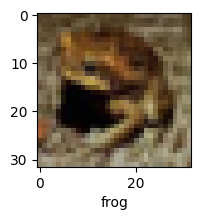

In [23]:
plot_sample(X_test, y_test,300)

In [24]:
classes[y_classes[300]]

'frog'

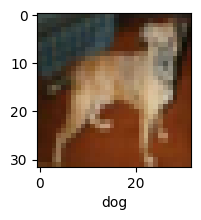

In [28]:
plot_sample(X_test, y_test,2003)

In [30]:
classes[y_classes[2003]]

'dog'